# Table of Contents
 <p><div class="lev2"><a href="#start-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>start</a></div><div class="lev2"><a href="#lal-helper-functions-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>lal helper functions</a></div><div class="lev2"><a href="#compare-ifft(v2_ROM)-with-TD(v2)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>compare ifft(v2_ROM) with TD(v2)</a></div><div class="lev3"><a href="#ifft-function-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>ifft function</a></div><div class="lev3"><a href="#getting-negative-frequencies-too-0.3.2"><span class="toc-item-num">0.3.2&nbsp;&nbsp;</span>getting negative frequencies too</a></div><div class="lev3"><a href="#playing-with-taper-0.3.3"><span class="toc-item-num">0.3.3&nbsp;&nbsp;</span>playing with taper</a></div><div class="lev3"><a href="#try1-0.3.4"><span class="toc-item-num">0.3.4&nbsp;&nbsp;</span>try1</a></div><div class="lev2"><a href="#try-pycbc-ifft-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>try pycbc ifft</a></div><div class="lev3"><a href="#quick-test-of-ians-FD-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>quick test of ians FD</a></div><div class="lev3"><a href="#compute-ifft-0.4.2"><span class="toc-item-num">0.4.2&nbsp;&nbsp;</span>compute ifft</a></div>

## start

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import phenom
import numpy as np

import lal
import lalsimulation as lalsim

In [2]:
import scipy
from scipy.fftpack import fft, fftfreq, fftshift, ifft

In [3]:
def peakindex(x):
    return list(np.abs(x)).index(np.max(np.abs(x)))

## lal helper functions

In [4]:
import lal
import lalsimulation as LS
import numpy as np

def q_from_eta(eta):
    """
    Assumes m1 >= m2
    converts symmetric-mass-ratio to mass-ratio
    input: eta
    output: q
    """
    Seta = np.sqrt(1. - 4. * eta)
    return (1. + Seta - 2. * eta)/(2. * eta)

def m1_m2_M_eta(M, eta):
    """
    Assumes m1 >= m2
    Computes the component masses m1 and m2
    from the total mass and symmetric mass-ratio.
    input: M, eta
    output: m1, m2
    """
    Seta = np.sqrt(1. - 4. * eta)
    m1 = 1./2. * (M + Seta * M)
    m2 = 1./2. * (M - Seta * M)
    return m1, m2

def CallTDWaveform(approx, M, eta, chi1z, chi2z, chi1x, f_min=10, srate=2**14, f_ref=0.0, iota=0):
    """assuming m1>=m2"""
    deltaT=1./srate
    q = q_from_eta(eta)
    m1, m2 = m1_m2_M_eta(M, eta)
    m1_SI = m1 * lal.MSUN_SI
    m2_SI = m2 * lal.MSUN_SI
    # print 'chi_eff = ', (m1*chi1 + m2*chi2)/M
    # f_max_Hz = f_max / (M * lal.MTSUN_SI)
    phiRef = 0.0
    S1x = chi1x
    S1y = 0.0
    S1z = chi1z
    S2x = 0.0
    S2y = 0.0
    S2z = chi2z
    r = 1e6 * lal.PC_SI
    z = 0.0
    i = iota
    lambda1 = 0.0
    lambda2 = 0.0
    waveFlags = None
    nonGRparams = None
    amplitudeO = -1
    phaseO = -1
    # approximant = LS.GetApproximantFromString("IMRPhenomPv2")
    approximant = LS.GetApproximantFromString(approx)
    # print approximant
    hp, hc = LS.SimInspiralChooseTDWaveform(phiRef,
                                            deltaT,
                                            m1_SI, m2_SI,
                                            S1x, S1y, S1z, S2x, S2y, S2z,
                                            f_min, f_ref,
                                            r,
                                            i,
                                            lambda1, lambda2, waveFlags, nonGRparams,
                                            amplitudeO, phaseO,
                                            approximant)
    t = np.arange(hp.data.length) * hp.deltaT

    #convert to units of total mass (dimensionless)
#     t = phenom.StoM(t, m1 + m2) # keeping time in seconds
    
    return t, hp.data.data, hc.data.data

def CallFDWaveform(approx, M, eta, chi1z, chi2z, chi1x, f_min=10, f_max=0, srate=2**14, f_ref=0.0, iota=0):
    """assuming m1>=m2"""
    deltaF=1./srate
    q = q_from_eta(eta)
    m1, m2 = m1_m2_M_eta(M, eta)
    m1_SI = m1 * lal.MSUN_SI
    m2_SI = m2 * lal.MSUN_SI
    # print 'chi_eff = ', (m1*chi1 + m2*chi2)/M
    # f_max_Hz = f_max / (M * lal.MTSUN_SI)
    phiRef = 0.0
    S1x = chi1x
    S1y = 0.0
    S1z = chi1z
    S2x = 0.0
    S2y = 0.0
    S2z = chi2z
    r = 1e6 * lal.PC_SI
    z = 0.0
    i = iota
    lambda1 = 0.0
    lambda2 = 0.0
    waveFlags = None
    nonGRparams = None
    amplitudeO = -1
    phaseO = -1
    # approximant = LS.GetApproximantFromString("IMRPhenomPv2")
    approximant = LS.GetApproximantFromString(approx)
    hp, hc = LS.SimInspiralChooseFDWaveform(phiRef,
                                            deltaF,
                                            m1_SI, m2_SI,
                                            S1x, S1y, S1z, S2x, S2y, S2z,
                                            f_min, f_max, f_ref,
                                            r,
                                            i,
                                            lambda1, lambda2, waveFlags, nonGRparams,
                                            amplitudeO, phaseO,
                                            approximant)
    f = np.arange(hp.data.length) * hp.deltaF
    
    #convert to units of total mass (dimensionless)
#     f = phenom.HztoMf(f, m1 + m2) # keeping frequency in Hz
    
    return f, hp.data.data, hc.data.data

In [5]:
from phenom.utils.utils import pad_to_pow_2

class WaveformTD(object):
    def __init__(self, t, hp, hc):
        
        self.t = t
        self.hp = hp
        self.hc = hc
        
        self.dt = self.t[1] - self.t[0]
        
        self.amp = self.get_amp(self.hp, self.hc)
        self.peak_index = self.get_peak_index(self.hp, self.hc)
        self.tshifted = self.shift_times(self.t, self.hp, self.hc)
        self.phase = self.get_phase(self.hp, self.hc)
        
#         self.f, self.hptilde, self.hctilde = self.compute_fft(self.t, self.hp, self.hc, self.dt)
        self.f, self.hptilde, self.hctilde = self.compute_fft(self.tshifted, self.hp, self.hc, self.dt)
        
    def get_amp(self, hp, hc):
        return np.sqrt(hp**2. + hc**2.)
    
    def get_peak_index(self, hp, hc):
        amp = self.get_amp(hp, hc)
        max_amp_index = list(amp).index(max(amp))
        return max_amp_index
    
    def shift_times(self, t, hp, hc):
        max_amp_index = self.get_peak_index(hp, hc)
        return t - t[max_amp_index]
    
    def get_phase(self, hp, hc):
        return np.unwrap(np.angle(hp + 1.j * hc))
    
    def compute_fft(self, t, hp, hc, dt):
        
        ptaper_lower = phenom.planck_taper(t, t[0], t[0] + 1000.)
#         ptaper_lower = phenom.planck_taper(t, t[0], t[0] + 2.)
        hp = ptaper_lower * hp
        hc = ptaper_lower * hc
        plt.plot(t, hp)
#         print("dt = {0}".format(dt))
        
#         t = pad_to_pow_2(t, 1)        
#         hp = pad_to_pow_2(hp, 1)
#         hc = pad_to_pow_2(hc, 1)
        
        
        N = len(t)
        hptilde = scipy.fftpack.fft(hp) * dt / phenom.StoM(1., 100.)
        hctilde = scipy.fftpack.fft(hc) * dt / phenom.StoM(1., 100.)
        f = scipy.fftpack.fftfreq(N, dt)
        
        mask = ( f > 0 )
        #return only positive frequencies
#         return f[0:N/2], hptilde[0:N/2], hctilde[0:N/2]

        #note that if the time domain waveform is in units of the total mass (M) then
        #we have to divide by the total mass in M

        return f[mask], hptilde[mask], hctilde[mask]


## compare ifft(v2_ROM) with TD(v2)

In [134]:
t={}
hp={}
hc={}
t['v2'], hp['v2'], hc['v2'] = CallTDWaveform("SEOBNRv2", 50., 0.2222, 0., 0., 0., f_min=10.)

In [130]:
f={}
hptilde={}
hctilde={}
f['v2'], hptilde['v2'], hctilde['v2'] = CallFDWaveform("SEOBNRv2_ROM_DoubleSpin", 50., 0.2222, 0., 0., 0., f_min=8., srate=64.)
# f['v2'], hptilde['v2'], hctilde['v2'] = CallFDWaveform("IMRPhenomPv2", 50., 0.2222, 0., 0., 0.9, f_min=10., srate=64.)
# f['v2'], hptilde['v2'], hctilde['v2'] = CallFDWaveform("IMRPhenomD", 100., 0.2222, 0., 0., 0., f_min=5., srate=128.)

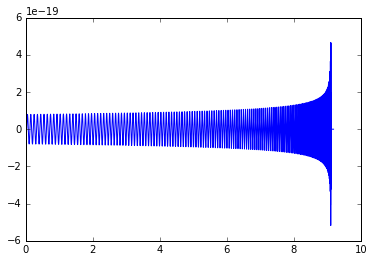

In [135]:
plt.figure()
plt.plot( t['v2'], hp['v2'] )

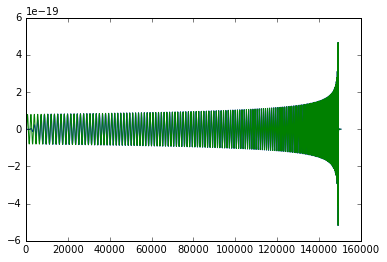

In [136]:
plt.plot(hp['v2']  * phenom.planck_taper( range(len(hp['v2'])), 0., 10000. ))
plt.plot(hp['v2']  )

In [137]:
myfft=fft((hp['v2'] + 1.j * hc['v2']) * phenom.planck_taper( range(len(hp['v2'])), 0., 4000. ))
# myfft=fft((hp['v2'] + 1.j * hc['v2']) )

(-100, 700)

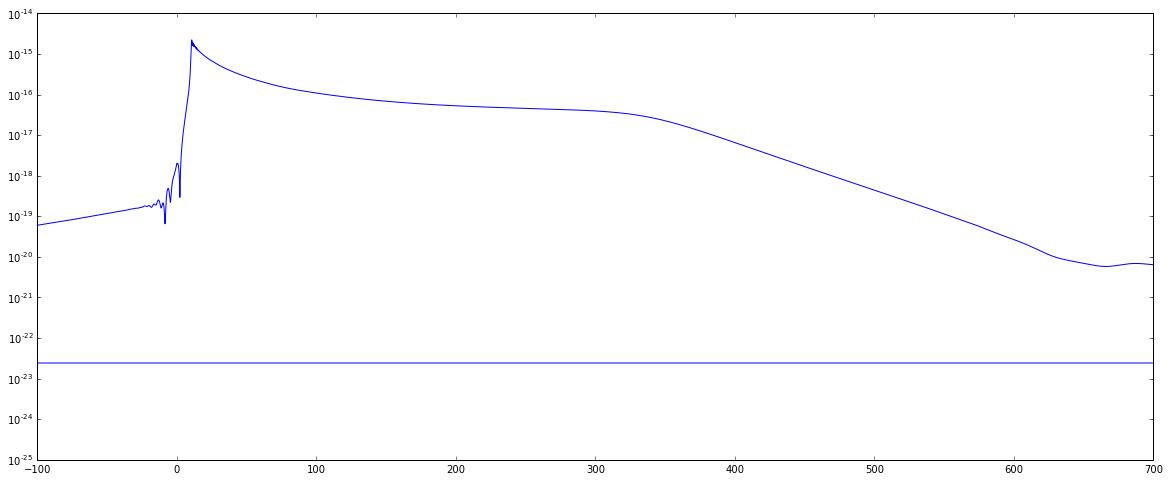

In [138]:
plt.figure( figsize=(20,8) )
plt.plot( scipy.fftpack.fftfreq(len(myfft), t['v2'][1]),   np.abs(myfft))
# plt.xscale('log')
plt.yscale('log')
plt.xlim(-100,700)

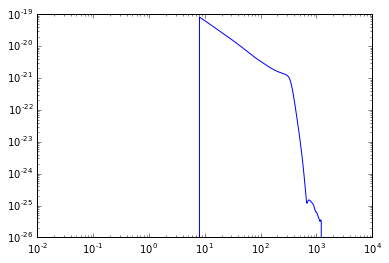

In [139]:
plt.figure()
plt.plot( f['v2'], np.abs(hptilde['v2']) )
plt.xscale('log')
plt.yscale('log')
# plt.xlim(20, 1600)

### ifft function

In [266]:
def invfft(f, htilde, f0, taper_low_width):
    phase = np.unwrap(np.angle(htilde))
    
#     phase_shift = (phase[0] - phase[-1])
    phase_shift = (phase[np.ceil(len(phase)/4.)] - phase[-1])

    htilde = htilde * np.exp( -1.j * 2. * np.pi * f * phase_shift)
    
    
#     ptaper_lower = phenom.planck_taper(f, float(f[1]), float(f[1] + taper_low_width))
#     htilde_taper = ptaper_lower * htilde
    
    
    win_minus = phenom.planck_taper( f, f0, f0 + taper_low_width )  
#     win_minus = phenom.planck_taper( frq, f0, f0 + taper_low_width )
#     win_plus = 1. - phenom.planck_taper( frq, 650., 690. )

#     htilde_taper = htilde * win_minus * win_plus    
    htilde_taper = htilde * win_minus

#     plt.figure()
#     plt.plot(f, np.abs(htilde))
#     plt.plot(f, np.abs(htilde_taper))
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.ylim(1e-27, 1e-17)
    
    df = f[1] - f[0]
    dt = 1.0 / ( df * len(f) )
    
    
    td = ifft(htilde_taper) / dt
    
#     plt.figure()
#     plt.plot(np.real(td))
    
    
    
    maxTime = dt * len(f)
    print("highest time (maxTime) = {0}".format(maxTime))
    print("dt = {0}".format(dt))
    
    times = np.arange( 0., maxTime, dt )
    
    return times, td

### getting negative frequencies too

In [35]:
f_full = np.concatenate( ( -f['v2'][::-1], f['v2'] ) )

In [43]:
h_full = np.concatenate( ( np.zeros(len(f['v2'])), hptilde['v2']  +  1.j* hctilde['v2'] ) )

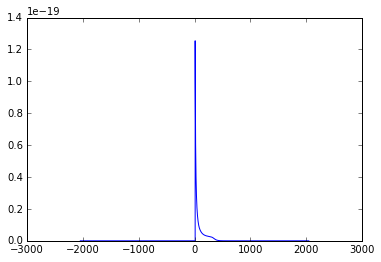

In [44]:
plt.plot(f_full, np.abs(h_full))

In [45]:
full_ifft = ifft(h_full)

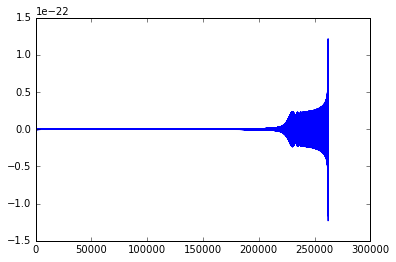

In [46]:
plt.plot(np.real(full_ifft))

### playing with taper

In [24]:
frq = f['v2']
htilde = hptilde['v2']  +  1.j* hctilde['v2']

(1e-37, 1e-18)

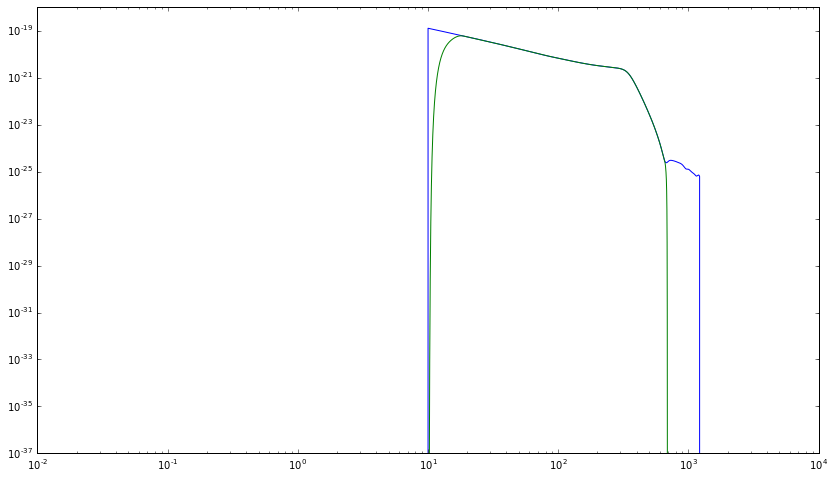

In [70]:
win_minus = phenom.planck_taper( frq, 10., 20. )
win_plus = 1. - phenom.planck_taper( frq, 650., 690. )

plt.figure( figsize=(14, 8) )
plt.plot( frq, np.abs(htilde) )
plt.plot( frq, np.abs(htilde * win_minus * win_plus ) )
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-37, 1e-18)

### try1

In [152]:
times={}
td={}

In [114]:
times['5'], td['5'] = invfft( f['v2'], hptilde['v2']  +  1.j* hctilde['v2'] , f0=1., taper_low_width=1.)

highest time (maxTime) = 64.0
dt = 0.000488277524738


In [ ]:
times['10'], td['10'] = invfft( f['v2'], hptilde['v2']  +  1.j* hctilde['v2'] , f0=1., taper_low_width=10.)

In [267]:
times['20'], td['20'] = invfft( f['v2'], hptilde['v2']  + 1.j* hctilde['v2'] , f0=8.,taper_low_width=2.)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


highest time (maxTime) = 64.0
dt = 0.000488277524738


(-1.4, 0.1)

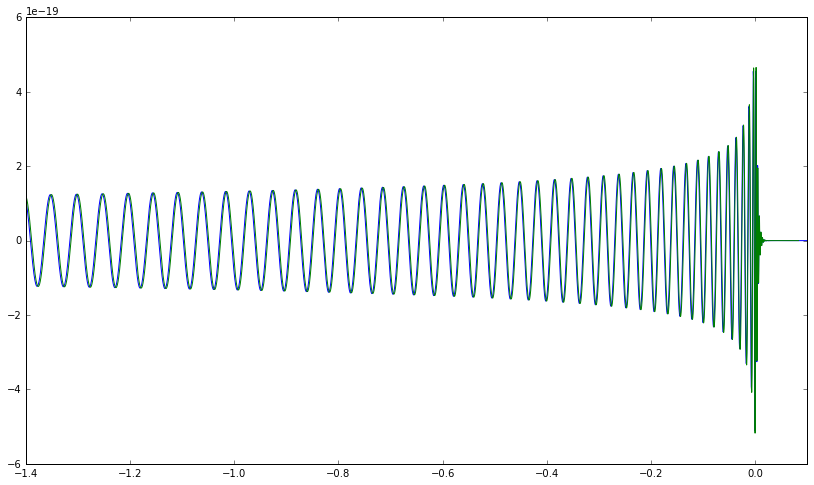

In [268]:
plt.figure( figsize=(14,8) )
# plt.plot( times['5'] - times['5'][peakindex(td['5'])], np.abs(td['5']) , label='ifft-5')
# plt.plot( times['10'] - times['10'][peakindex(td['10'])], np.abs(td['10']) , label='ifft-10')
# plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.abs(td['20']) , label='ifft-20')
plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.real(td['20']) , label='ifft-20')
plt.plot( t['v2'] - t['v2'][peakindex(hp['v2'])] , hp['v2'], label='TD')
plt.xlim(-1.4,0.1)
# plt.xlim(-10,1)

(-0.1, 0.1)

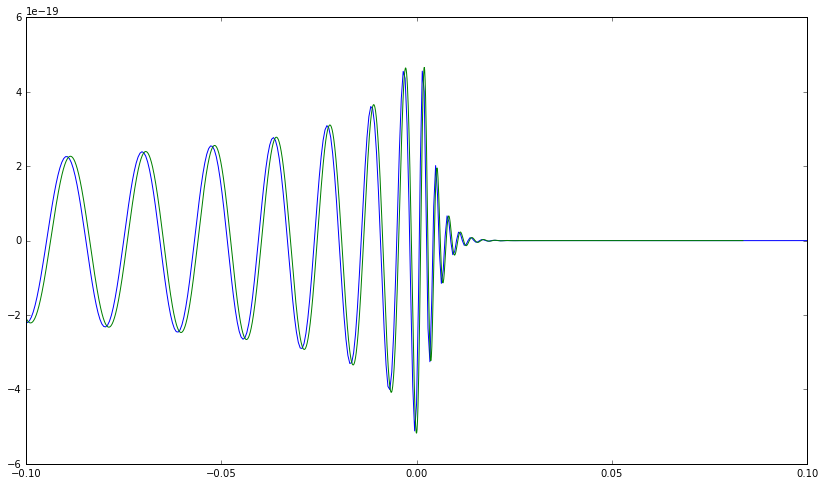

In [269]:
plt.figure( figsize=(14,8) )
# plt.plot( times['5'] - times['5'][peakindex(td['5'])], np.abs(td['5']) , label='ifft-5')
# plt.plot( times['10'] - times['10'][peakindex(td['10'])], np.abs(td['10']) , label='ifft-10')
# plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.abs(td['20']) , label='ifft-20')
plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.real(td['20']) , label='ifft-20')
plt.plot( t['v2'] - t['v2'][peakindex(hp['v2'])] , hp['v2'], label='TD')
plt.xlim(-0.1,0.1)
# plt.xlim(-10,1)

(-0.1, 0.1)

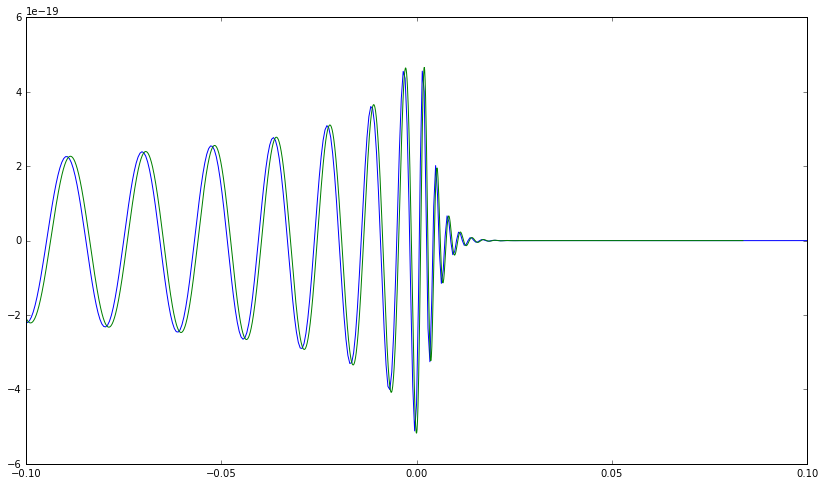

In [270]:
plt.figure( figsize=(14,8) )
# plt.plot( times['5'] - times['5'][peakindex(td['5'])], np.abs(td['5']) , label='ifft-5')
# plt.plot( times['10'] - times['10'][peakindex(td['10'])], np.abs(td['10']) , label='ifft-10')
# plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.abs(td['20']) , label='ifft-20')
plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.real(td['20']) , label='ifft-20')
plt.plot( t['v2'] - t['v2'][peakindex(hp['v2'])] , hp['v2'], label='TD')
plt.xlim(-0.1,0.1)
# plt.xlim(-10,1)

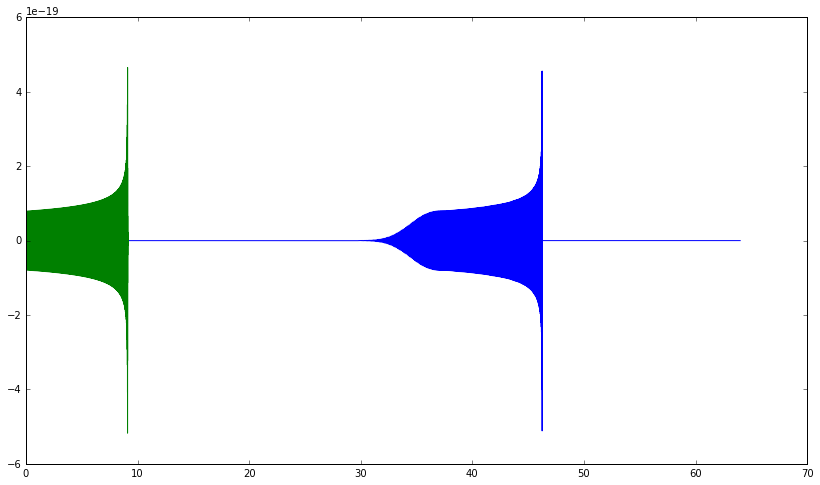

In [271]:
plt.figure( figsize=(14,8) )
plt.plot( times['20'], np.real(td['20']) , label='ifft-20')
plt.plot( t['v2']  , hp['v2'], label='TD')
# plt.xlim(-0.1,0.1)
# plt.xlim(-10,1)

In [247]:
td_phase = np.unwrap(np.angle(td['20']))

v2_phase = np.unwrap(np.angle(hp['v2'] - 1.j * hc['v2']))

In [248]:
(t['v2']- t['v2'][peakindex(hp['v2'])])[-1]

0.08355712890625

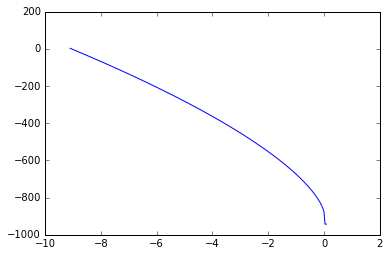

In [249]:
plt.plot(t['v2']- t['v2'][peakindex(hp['v2'])], v2_phase)

In [193]:
from scipy.interpolate import interp1d

In [250]:
iphase = interp1d(times['20'] - times['20'][peakindex(td['20'])], td_phase)
iphase_v2 = interp1d(t['v2']- t['v2'][peakindex(hp['v2'])], v2_phase)

In [251]:
iphase(0)

array(1367.1684259416209)

In [252]:
print -iphase_v2(0)
print iphase(0)
shift = -iphase_v2(0) - iphase(0)
print shift

882.824551857
1367.16842594
-484.343874084


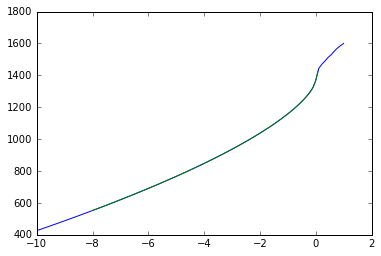

In [253]:
plt.plot( np.linspace(-10,1, 100), iphase(np.linspace(-10,1, 100)) )
plt.plot( np.linspace(-8,0.08, 100), -iphase_v2(np.linspace(-8,0.08, 100)) - shift )

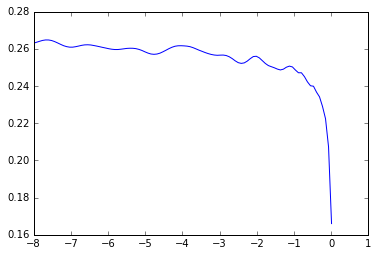

In [239]:
# plt.plot( np.linspace(-8,0.08, 100), iphase(np.linspace(-8,0.08, 100)) )
# plt.plot( np.linspace(-8,0.08, 100), -iphase_v2(np.linspace(-8,0.08, 100)) - shift )
plt.plot( np.linspace(-8,0.01, 100), np.abs(iphase(np.linspace(-8,0.01, 100)) - (-iphase_v2(np.linspace(-8,0.01, 100)) - shift)) )

In [231]:
# phase_shift_exp  =  np.exp( -1.j  * shift * (times['20'] - times['20'][peakindex(td['20'])]) * 0)
phase_shift_exp  =  np.exp( 1.j  * shift)

(-10, 1)

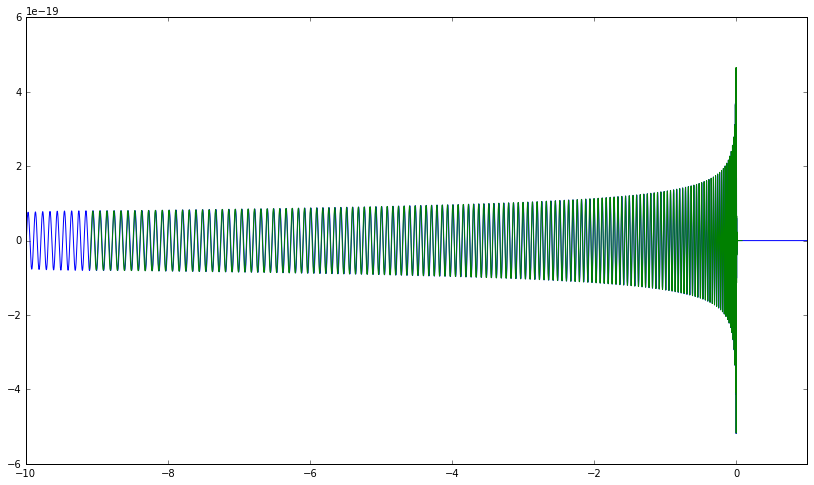

In [240]:
plt.figure( figsize=(14,8) )
# plt.plot( times['5'] - times['5'][peakindex(td['5'])], np.abs(td['5']) , label='ifft-5')
# plt.plot( times['10'] - times['10'][peakindex(td['10'])], np.abs(td['10']) , label='ifft-10')
# plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.abs(td['20']) , label='ifft-20')
plt.plot( times['20'] - times['20'][peakindex(td['20'])], np.real(td['20'] * phase_shift_exp) , label='ifft-20')
plt.plot( t['v2'] - t['v2'][peakindex(hp['v2'])] , hp['v2'], label='TD')
# plt.xlim(-1.1,0.1)
plt.xlim(-10,1)

## try pycbc ifft

In [10]:
#coppied from 
# https://galahad.aei.mpg.de/~spxiwh/LVC/aLIGO/O1/analyses/event_precessing/tmp_plots2/plot_waveform.py

In [11]:
import pylab
from pycbc import types, fft, waveform

from pycbc.fft import fftw
from pycbc.filter import sigma
import pycbc.psd
import numpy

In [12]:
fftw.set_measure_level(0)

### quick test of ians FD

In [16]:
phenompv3 = phenom.Waveform(approximant="IMRPhenomPv3")
from copy import copy
phenpv3_1 = copy(phenompv3)

In [33]:
phenpv3_1.input_params['m1']=80.4782639
phenpv3_1.input_params['m2']=16.384655
phenpv3_1.input_params['chi1x']=0.062809065
phenpv3_1.input_params['chi1y']=0.528722703
phenpv3_1.input_params['chi1z']=-0.77006942
phenpv3_1.input_params['chi2x']=-0.102698207
phenpv3_1.input_params['chi2y']=-0.0977499112
phenpv3_1.input_params['chi2z']=-0.0815029368
phenpv3_1.input_params['inclination']=2.85646439
phenpv3_1.input_params['f_min']=10
phenpv3_1.input_params['delta_f']=1.0/8

In [34]:
#phenomp_v3 waveform generator
phenpv3_1.phenompv3(phenpv3_1.input_params)

In [37]:
uval = 0.733294666
stilde_v3 = phenpv3_1.hptilde * uval + phenpv3_1.hctilde 

In [35]:
ph_phpLAL = phenom.Waveform(approximant='IMRPhenomPv2_LAL',m1=80.4782639, m2=16.384655,
                            chi1x=0.062809065, chi1y=0.528722703, chi1z=-0.77006942,
                            chi2x=-0.102698207, chi2y=-0.0977499112, chi2z=-0.0815029368,
                            delta_f=1.0/8, f_min=10, inclination=2.85646439)

In [53]:
sptilde, sctilde = waveform.get_fd_waveform(approximant="IMRPhenomPv2", mass1=80.4782639, mass2=16.384655, delta_f=1.0/256, f_lower=30, spin1x = 0.062809065, spin1y=0.528722703, spin1z=-0.77006942, spin2x=-0.102698207, spin2y=-0.0977499112, spin2z=-0.0815029368, inclination=2.85646439)

sptilde2, sctilde2 = waveform.get_fd_waveform(approximant="IMRPhenomPv2", mass1=80.4782639, mass2=16.384655, delta_f=1.0/256, f_lower=30, spin1z=-0.77006942, spin2z=-0.0815029368, inclination=2.85646439)

sptilde3, sctilde3 = waveform.get_fd_waveform(approximant="IMRPhenomD", mass1=80.4782639, mass2=16.384655, delta_f=1.0/256, f_lower=30, spin1z=0., spin2z=0., inclination=2.85646439)

uval = 0.733294666
stilde = sptilde * uval + sctilde 

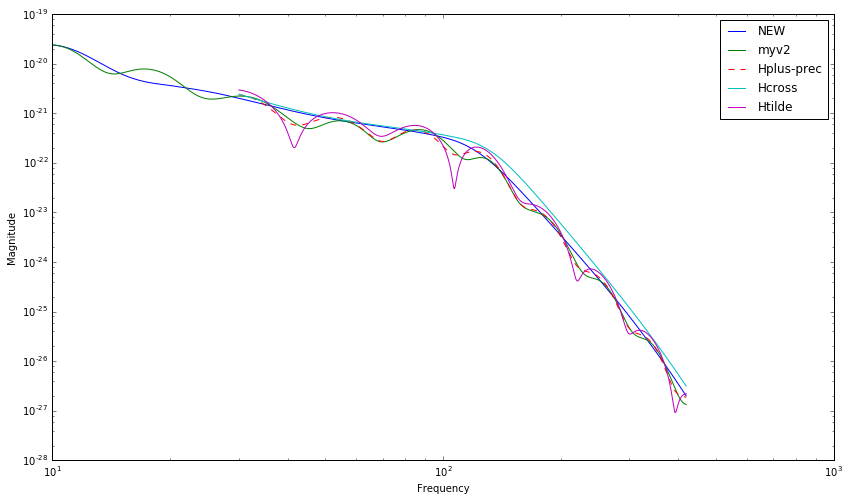

In [41]:
pylab.figure( figsize=(14,8) )


pylab.loglog(phenpv3_1.flist_Hz, np.absolute(phenpv3_1.hptilde) / phenpv3_1.flist_Hz**0.5, label='NEW'  )

# pylab.loglog(phenpv3_1.flist_Hz, np.absolute(stilde_v3) / phenpv3_1.flist_Hz**0.5, label='NEW-tilde'  )

pylab.loglog(ph_phpLAL.flist_Hz, np.absolute(ph_phpLAL.hptilde) / ph_phpLAL.flist_Hz**0.5, label='myv2'  )


pylab.loglog(sptilde.sample_frequencies[1:], numpy.abs(sptilde.data)[1:] / sptilde.sample_frequencies.data[1:]**0.5, label="Hplus-prec", ls='--')
pylab.loglog(sctilde2.sample_frequencies[1:], numpy.abs(sctilde2.data)[1:] / sctilde2.sample_frequencies.data[1:]**0.5, label="Hcross")
pylab.loglog(stilde.sample_frequencies[1:], numpy.abs(stilde.data)[1:] / stilde.sample_frequencies.data[1:]**0.5, label="Htilde")
pylab.ylabel('Magnitude')
pylab.xlabel('Frequency')
pylab.xlim(10,1000)
pylab.legend()

### compute ifft

In [50]:
print "FFTing"

# FFT it to the time-domain
delta_t = 1.0/4096.
tlen = 1.0 / delta_t / sptilde.delta_f
sptilde.resize(tlen/2 + 1)
sctilde.resize(tlen/2 + 1)
stilde.resize(tlen/2 + 1)

sp = types.TimeSeries(types.zeros(tlen), delta_t=delta_t)
fft.ifft(sptilde, sp)
sc = types.TimeSeries(types.zeros(tlen), delta_t=delta_t)
fft.ifft(sctilde, sc)
sb = types.TimeSeries(types.zeros(tlen), delta_t=delta_t)
fft.ifft(stilde, sb)

FFTing


In [56]:

sptilde2.resize(tlen/2 + 1)
sctilde2.resize(tlen/2 + 1)
sp2 = types.TimeSeries(types.zeros(tlen), delta_t=delta_t)
fft.ifft(sptilde2, sp2)
sc2 = types.TimeSeries(types.zeros(tlen), delta_t=delta_t)
fft.ifft(sctilde2, sc2)

sptilde3.resize(tlen/2 + 1)
sctilde3.resize(tlen/2 + 1)
sp3 = types.TimeSeries(types.zeros(tlen), delta_t=delta_t)
fft.ifft(sptilde3, sp3)
sc3 = types.TimeSeries(types.zeros(tlen), delta_t=delta_t)
fft.ifft(sctilde3, sc3)

sc.roll(-4096)
sp.roll(-4096)
sb.roll(-4096)
sc2.roll(-4096)
sp2.roll(-4096)
sc3.roll(-4096)
sp3.roll(-4096)

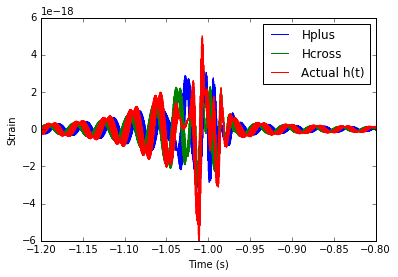

In [55]:

pylab.figure()
pylab.plot(sp.sample_times, sp, label="Hplus")
pylab.plot(sc.sample_times, sc, label="Hcross")
pylab.plot(sb.sample_times, sb, label="Actual h(t)")

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.xlim(-1.2,-0.8)
pylab.legend()
# pylab.savefig('waveform.png')

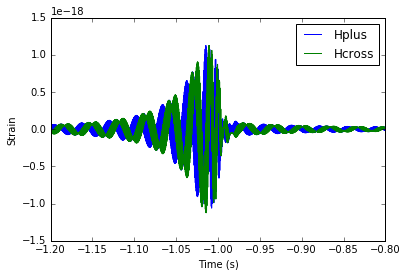

In [57]:
pylab.figure()

pylab.plot(sp2.sample_times, sp2, label="Hplus")
pylab.plot(sc2.sample_times, sc2, label="Hcross")

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.xlim(-1.2,-0.8)
pylab.legend()
# pylab.savefig('waveform2.png')

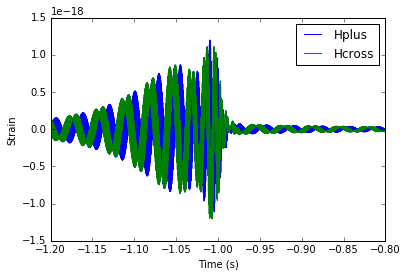

In [58]:
pylab.figure()

pylab.plot(sp3.sample_times, sp3, label="Hplus")
pylab.plot(sc3.sample_times, sc3, label="Hcross")

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.xlim(-1.2,-0.8)
pylab.legend()
# pylab.savefig('waveform3.png')